In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
img = cv2.imread('./test_images/images - 2019-08-16T084421.737.jpg')
img.shape

(183, 275, 3)

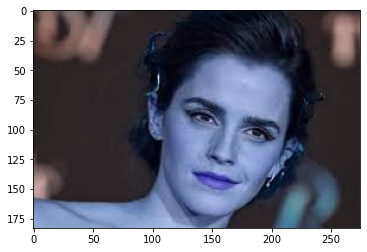

In [20]:
plt.imshow(img)

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

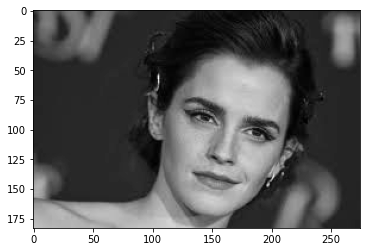

In [22]:
plt.imshow(gray, cmap='gray')

In [23]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[100,  43, 130, 130]], dtype=int32)

In [24]:
(x,y,w,h) = faces[0]
x,y,w,h

(100, 43, 130, 130)

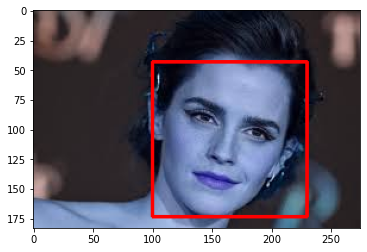

In [25]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

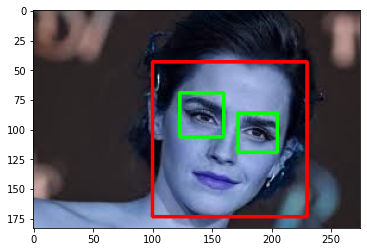

In [26]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

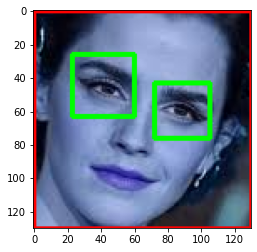

In [27]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [28]:
cropped_img = np.array(roi_color)
cropped_img.shape

(130, 130, 3)

In [29]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

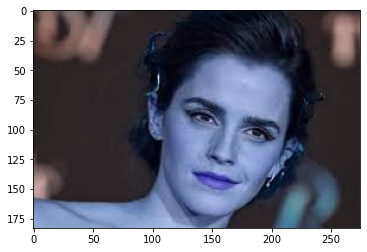

In [31]:
original_image = cv2.imread('./test_images/images - 2019-08-16T084421.737.jpg')
plt.imshow(original_image)

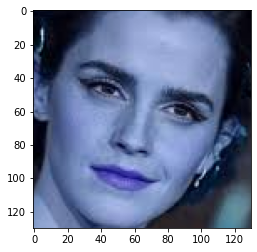

In [32]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/images - 2019-08-16T084421.737.jpg')
plt.imshow(cropped_image)

In [41]:
## stackoverflow is godd
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

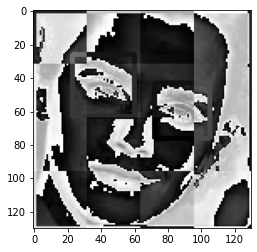

In [42]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

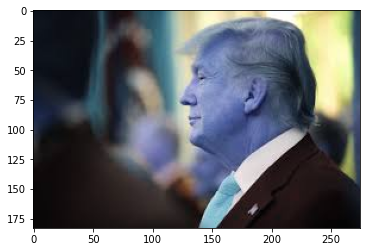

In [40]:
org_image_obstructed = cv2.imread('./test_images/images - 2019-08-15T151814.247.jpg')
plt.imshow(org_image_obstructed)

In [34]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/images - 2019-08-15T151814.247.jpg')
cropped_image_no_2_eyes

In [35]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [36]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [37]:
img_dirs

['./dataset/.ipynb_checkpoints',
 './dataset/Brad',
 './dataset/Daniel',
 './dataset/Elon',
 './dataset/Ema',
 './dataset/Emilia',
 './dataset/Maisie',
 './dataset/Obama',
 './dataset/Tom',
 './dataset/Trump',
 './dataset/Zuckerberg']

In [38]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Brad
Generating cropped images in folder:  ./dataset/cropped/Daniel
Generating cropped images in folder:  ./dataset/cropped/Elon
Generating cropped images in folder:  ./dataset/cropped/Ema
Generating cropped images in folder:  ./dataset/cropped/Emilia
Generating cropped images in folder:  ./dataset/cropped/Maisie
Generating cropped images in folder:  ./dataset/cropped/Obama
Generating cropped images in folder:  ./dataset/cropped/Tom
Generating cropped images in folder:  ./dataset/cropped/Trump
Generating cropped images in folder:  ./dataset/cropped/Zuckerberg


In [79]:
celebrity_file_names_dict
del celebrity_file_names_dict[".ipynb_checkpoints"]
celebrity_file_names_dict

{'Brad': ['./dataset/cropped/Brad/Brad1.png',
  './dataset/cropped/Brad/Brad2.png',
  './dataset/cropped/Brad/Brad3.png',
  './dataset/cropped/Brad/Brad4.png',
  './dataset/cropped/Brad/Brad5.png',
  './dataset/cropped/Brad/Brad6.png',
  './dataset/cropped/Brad/Brad7.png',
  './dataset/cropped/Brad/Brad8.png',
  './dataset/cropped/Brad/Brad9.png',
  './dataset/cropped/Brad/Brad10.png',
  './dataset/cropped/Brad/Brad11.png',
  './dataset/cropped/Brad/Brad12.png',
  './dataset/cropped/Brad/Brad13.png',
  './dataset/cropped/Brad/Brad14.png',
  './dataset/cropped/Brad/Brad15.png',
  './dataset/cropped/Brad/Brad16.png',
  './dataset/cropped/Brad/Brad17.png',
  './dataset/cropped/Brad/Brad18.png',
  './dataset/cropped/Brad/Brad19.png',
  './dataset/cropped/Brad/Brad20.png',
  './dataset/cropped/Brad/Brad21.png',
  './dataset/cropped/Brad/Brad22.png',
  './dataset/cropped/Brad/Brad23.png',
  './dataset/cropped/Brad/Brad24.png',
  './dataset/cropped/Brad/Brad25.png',
  './dataset/cropped/Brad/

In [80]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Brad': 0,
 'Daniel': 1,
 'Elon': 2,
 'Ema': 3,
 'Emilia': 4,
 'Maisie': 5,
 'Obama': 6,
 'Tom': 7,
 'Trump': 8,
 'Zuckerberg': 9}

In [81]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [82]:
len(X[0])

4096

In [83]:
X[0]

array([[186],
       [184],
       [183],
       ...,
       [  6],
       [ 15],
       [ 11]], dtype=uint8)

In [84]:
y[0]

0

In [85]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(456, 4096)

In [86]:
X[0]

array([186., 184., 183., ...,   6.,  15.,  11.])

In [87]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.631578947368421

In [89]:
len(X_test)

114

In [90]:
print(classification_report(y_test, pipe.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.76      0.89      0.82        18
           2       0.58      0.70      0.64        10
           3       0.50      0.50      0.50        12
           4       0.38      0.40      0.39        15
           5       0.69      0.91      0.78        22
           6       0.83      0.62      0.71         8
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.64      0.82      0.72        11

    accuracy                           0.63       114
   macro avg       0.54      0.51      0.50       114
weighted avg       0.63      0.63      0.60       114



In [91]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [92]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\naman solanki\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\naman solanki\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\naman solanki\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.637212,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.406522,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.701833,{'logisticregression__C': 1}


In [93]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5087719298245614

In [94]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5263157894736842

In [95]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21052631578947367

In [96]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.45614035087719296

In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.41228070175438597

In [98]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6842105263157895

### we'll go with logisticRegression

In [99]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7456140350877193

In [100]:
best_estimators['svm'].score(X_test, y_test)

0.7807017543859649

In [101]:
best_clf = best_estimators['logistic_regression']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  1,  2,  0,  0,  0,  0,  1],
       [ 0, 17,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  1,  1,  0,  0,  0],
       [ 2,  0,  0,  9,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  6,  7,  1,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0, 19,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  1],
       [ 0,  0,  1,  2,  0,  0,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

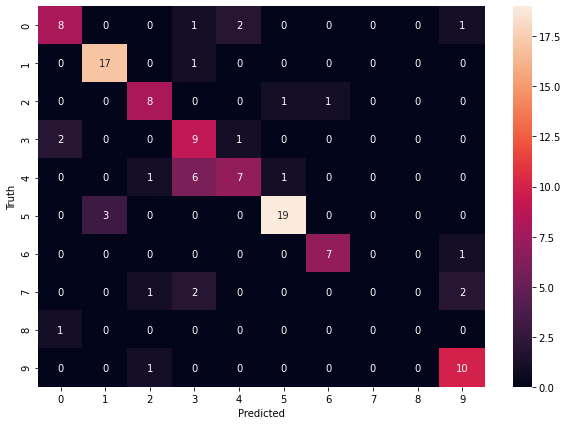

In [102]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
class_dict

{'Brad': 0,
 'Daniel': 1,
 'Elon': 2,
 'Ema': 3,
 'Emilia': 4,
 'Maisie': 5,
 'Obama': 6,
 'Tom': 7,
 'Trump': 8,
 'Zuckerberg': 9}

In [104]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [105]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))